In [1]:
import os
import time

import numpy as np
import pandas as pd

from ipywidgets import interact

import larch

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

os.chdir('..')
os.chdir('./catxas')
import catxas

#Timer to see how long it runs
t1 = time.time()

No conda env active, defaulting to base


# 1. Define where Data is Stored

In [2]:
### Modify paths inside the '' ###

# Folder containing ONLY CXAS spectra
data_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\Raw Data'

# Mass Spec File:
MS_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2View1.csv'

# AmP LabView File:
LV_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2.txt'

# 2. Define BL Data Structure

In [3]:
### Define the layout of the xas data file and how spectra are calcualted
cxas_data_structure = {
    'time stamp': True,
    'time on line': 5,
    'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'ADC_06', 'ADC_07', 'ADC_08'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_01', # I0
    'sample denominator': 'ADC_02', # I1
    'sample ln': True,
    'sample invert': False,
    'reference numerator': 'ADC_02', # I1
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False   
}

# 3. Create Experiment Class and Import  Data
## 3a. Create Experiment Class

In [4]:
# Create the Experimental Class
my_exp = catxas.Experiment("SnO2_H2Reduction")

# View keys created inside it
my_exp.__dict__.keys()

dict_keys(['name', 'process_params', 'spectra', 'analysis', 'summary'])

## 3b. Add BL Data

In [5]:
# Add raw data into spectra files
my_exp.import_spectra_data(data_dir, cxas_data_structure)

In [6]:
# Show that the spectra were added to the experiment
list(my_exp.spectra.keys())

['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0011',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0012',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0013',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0014',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0015',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0016',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0017',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0018',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0019',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0020',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0021',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92

In [7]:
scan_name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'
scan_name2 = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002'

In [8]:
# Check contents of single spectrum
my_exp.spectra[scan_name].keys()

dict_keys(['XAS Data Structure', 'Time', 'BL Data'])

In [9]:
# Check contents of single spectrum BL Data
my_exp.spectra[scan_name]['BL Data'].array_labels

['Encoder',
 'Energy',
 'ADC_01',
 'ADC_02',
 'ADC_03',
 'ADC_04',
 'ADC_05',
 'ADC_06',
 'ADC_07',
 'ADC_08']

In [10]:
# Organize Data to remove duplicate encover values
my_exp.organize_RawData()

Duplicate data points removed


## 3c. Add Process Parameter Data 

In [11]:
# Add Mass Spec Dataset
my_exp.import_massspec(MS_filename)

# Add LabView Dataset
my_exp.import_labview(LV_filename)

# Display Keys of System
my_exp.process_params.keys()

dict_keys(['MS Data', 'LV Data'])

In [12]:
# Check contents of Mass Spec Data
my_exp.process_params['MS Data']

,H2,He,H2O,28,O2,Ar,CO2,T,Vac
Time,,,,,,,,,
2021-06-14 16:20:01,4.299990e-09,1.805990e-07,0.000000e+00,8.599980e-09,4.299990e-09,0.000004,4.299990e-09,26.6066,0.000002
2021-06-14 16:21:11,-2.687490e-09,1.807280e-07,3.364740e-09,9.406230e-09,7.395980e-09,0.000004,-6.664980e-10,26.8216,0.000002
2021-06-14 16:22:25,4.299990e-10,7.245480e-08,3.009990e-09,2.390790e-07,5.084740e-08,0.000004,2.149990e-10,26.8753,0.000002
2021-06-14 16:23:45,5.019160e-10,1.076100e-07,3.790010e-09,1.096490e-08,2.444970e-09,0.000004,6.912230e-11,26.6603,0.000002
2021-06-14 16:25:09,4.829750e-10,1.792020e-07,4.147460e-09,8.601270e-09,2.168300e-09,0.000004,4.668710e-11,26.4991,0.000002
...,...,...,...,...,...,...,...,...,...
2021-06-14 18:20:21,5.416910e-07,4.799540e-10,4.458250e-09,8.252680e-09,1.907100e-09,0.000004,6.298410e-11,34.4542,0.000002
2021-06-14 18:22:07,5.431960e-07,4.621950e-10,4.339750e-09,8.156480e-09,1.886550e-09,0.000004,7.524980e-11,32.7879,0.000002
2021-06-14 18:23:54,5.356710e-07,4.511440e-10,4.237500e-09,8.210780e-09,1.871380e-09,0.000004,7.626030e-11,31.4441,0.000002


In [13]:
# Check contents of Mass Spec Data
my_exp.process_params['LV Data']

,Stepnumber,T1 [°C],T2 [°C],T3 [°C],T4 [°C],P1 [psig],P2 [psig],P3 [psig],P4 [psig],P5 [psig],...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-14 16:21:03,0,2300.219119,2300.219119,2300.553746,2300.553746,38.706421,35.939952,41.897544,21.463028,33.594850,...,2300.219119,2300.553746,2300.553746,2300.553746,2300.394651,2300.394651,0,0,0,0
2021-06-14 16:21:33,0,2300.198863,2300.198863,2300.532837,2300.532837,38.687824,35.917171,41.890229,21.452139,33.594887,...,2300.198863,2300.532837,2300.532837,2300.532837,2300.374134,2300.374134,0,0,0,0
2021-06-14 16:21:48,0,2300.189610,2300.189610,2300.523607,2300.523607,38.695046,35.935024,41.893391,21.446253,33.595110,...,2300.189610,2300.523607,2300.523607,2300.523607,2300.364931,2300.364931,0,0,0,0
2021-06-14 16:22:03,0,2300.161798,2300.161798,2300.495868,2300.495868,38.687669,35.926842,41.884340,21.441242,33.594748,...,2300.161798,2300.495868,2300.495868,2300.495868,2300.336650,2300.336650,0,0,0,0
2021-06-14 16:22:18,0,2300.134546,2300.134546,2300.467706,2300.467706,38.721484,35.926780,41.883814,21.436323,33.594831,...,2300.134546,2300.467706,2300.467706,2300.467706,2300.309060,2300.309060,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14 18:32:03,0,2300.894228,2300.894228,2301.199352,2301.199352,38.343848,35.931987,41.292099,21.748877,33.595129,...,2300.894228,2301.199352,2301.199352,2301.199352,2301.064829,2301.064829,0,0,0,0
2021-06-14 18:32:18,0,2300.862918,2300.862918,2301.170420,2301.170420,38.394245,35.923742,41.314942,21.740043,33.595464,...,2300.862918,2301.170420,2301.170420,2301.170420,2301.035148,2301.035148,0,0,0,0
2021-06-14 18:32:33,0,2300.885955,2300.885955,2301.195606,2301.195606,38.439311,35.921294,41.329540,21.731563,33.594859,...,2300.885955,2301.195606,2301.195606,2301.195606,2301.059272,2301.059272,0,0,0,0


# 4. Correlate Process Paramters to X-ray Spectra Timestamps
## 4a. Correlate Parameters

In [14]:
# Correlate Process Params
my_exp.correlate_process_params()

# View Correlation Table
my_exp.summary['XAS Spectra Process Params']

,File Name,H2,He,H2O,28,O2,Ar,CO2,T,Vac,...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-14 16:33:52,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,4.929417e-10,1.810452e-07,6.951219e-09,8.664734e-09,2.471646e-09,0.000004,7.719114e-11,26.120772,0.000002,...,2300.190768,2300.464815,2300.464815,2300.464815,2300.343342,2300.343342,0.0,0.0,0.0,0.0
2021-06-14 16:35:37,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,4.931230e-10,1.827490e-07,6.926960e-09,8.628440e-09,2.426090e-09,0.000004,7.898010e-11,25.907800,0.000002,...,2300.228154,2300.499174,2300.499174,2300.499174,2300.378966,2300.378966,0.0,0.0,0.0,0.0
2021-06-14 16:37:23,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,4.713019e-10,1.821100e-07,6.798056e-09,8.669651e-09,2.461149e-09,0.000004,7.286727e-11,26.067593,0.000002,...,2300.241883,2300.510800,2300.510800,2300.510800,2300.391108,2300.391108,0.0,0.0,0.0,0.0
2021-06-14 16:39:11,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,4.056493e-09,1.949101e-07,7.054554e-09,9.396570e-09,1.122279e-08,0.000004,1.175604e-10,26.068597,0.000002,...,2300.262552,2300.529460,2300.529460,2300.529460,2300.409950,2300.409950,0.0,0.0,0.0,0.0
2021-06-14 16:40:57,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,1.128710e-08,1.397490e-08,7.368780e-09,8.759550e-09,4.797820e-09,0.000004,9.577160e-11,26.015300,0.000002,...,2300.294947,2300.559966,2300.559966,2300.559966,2300.440447,2300.440447,0.0,0.0,0.0,0.0
2021-06-14 16:42:42,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,1.628722e-08,7.763893e-09,7.012374e-09,8.508112e-09,3.144702e-09,0.000004,1.011230e-10,25.964397,0.000002,...,2300.302634,2300.566300,2300.566300,2300.566300,2300.444244,2300.444244,0.0,0.0,0.0,0.0
2021-06-14 16:44:27,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,1.677209e-07,6.677977e-09,6.732073e-09,8.423802e-09,2.903965e-09,0.000004,9.577366e-11,26.007782,0.000002,...,2300.321962,2300.584995,2300.584995,2300.584995,2300.463512,2300.463512,0.0,0.0,0.0,0.0
2021-06-14 16:46:13,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,5.390002e-07,6.013107e-09,6.438386e-09,8.409555e-09,2.787266e-09,0.000004,8.044948e-11,25.961600,0.000002,...,2300.348302,2300.611476,2300.611476,2300.611476,2300.491137,2300.491137,0.0,0.0,0.0,0.0
2021-06-14 16:47:59,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,5.453353e-07,5.441864e-09,6.127758e-09,8.365563e-09,2.705257e-09,0.000004,8.813759e-11,26.992001,0.000002,...,2300.356767,2300.619987,2300.619987,2300.619987,2300.500101,2300.500101,0.0,0.0,0.0,0.0


## 4b. Save Correlation Table

In [15]:
# Save Process paramters:

# Define path and filename to save Correlated Process Parameters:
output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'

# Save the Values
my_exp.save_processparams(output_dir)

Process Parameter Data Saved


# 5. Calcualte Absorption Spectra [Sample and/or Reference]

In [16]:
# Calculates the absoprtion spectra of the sample and the reference 
my_exp.calculate_spectra(sample_spectra = True, ref_spectra = True)

In [17]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
name,str


In [18]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Reference']

Attribute,Type
energy,ndarray
mu,ndarray
name,str


(29150.0, 29300.0)

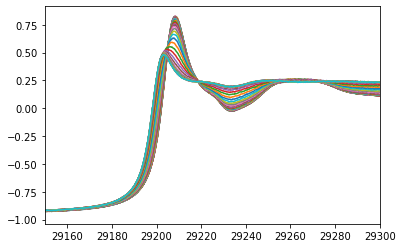

In [19]:
# Quick Visualization of Raw Data
for key in my_exp.spectra.keys():
    x = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].energy
    y = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].mu
    plt.plot(x,y)
    
plt.xlim([29150, 29300])

# 6. Calibrate Spectra
## 6a. Calibrate Reference Spectra

Reference Calibraiton Statistics:
Reference E0 min: 29197.43 eV
Reference E0 max: 29200.21 eV
Reference E0 mean: 29198.84 +/- 0.58 eV
Reference E0 calibrated to: 29200.00 eV
Spectra shifted by 1.16 eV




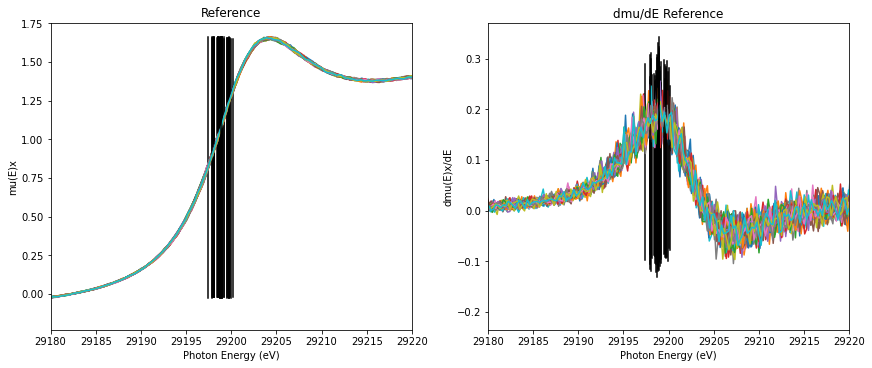

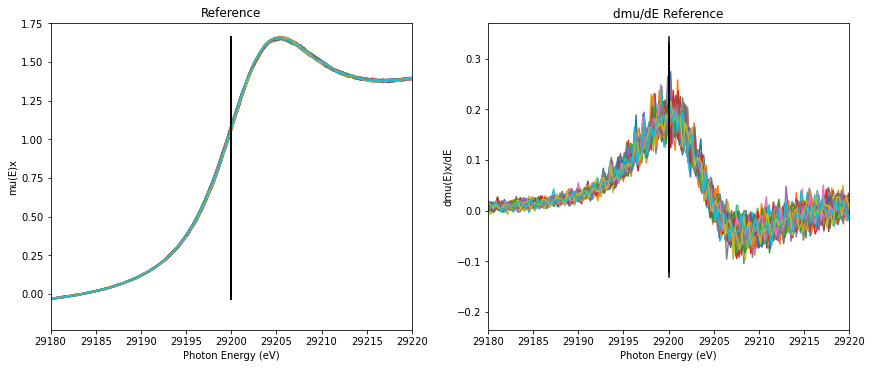

In [20]:
#Reference Calibration Energy

#### add functional to calibrate each spectra separately
Ref_E0 = 29200
my_exp.calibrate_reference_spectra(Ref_E0, use_mean = True)

## 6b. Calculate Sample E0

Sample Calibraiton Statistics:
Sample E0 min: 29199.02 eV
Sample E0 max: 29205.77 eV
Sample E0 mean: 29202.71 +/- 2.43 eV
Sample E0 set to: 29202.71 eV




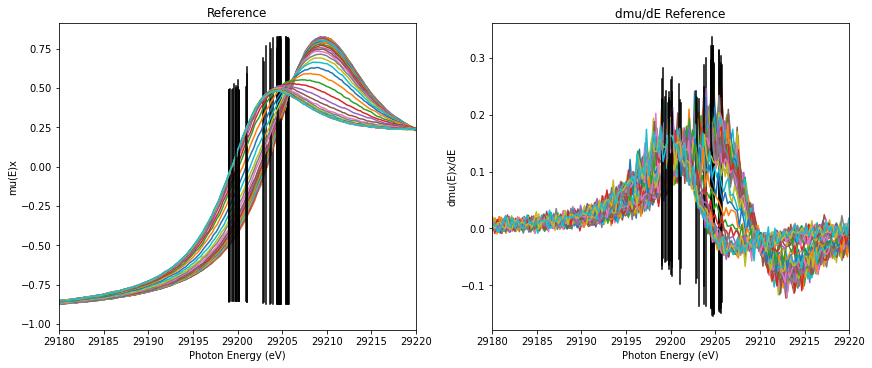

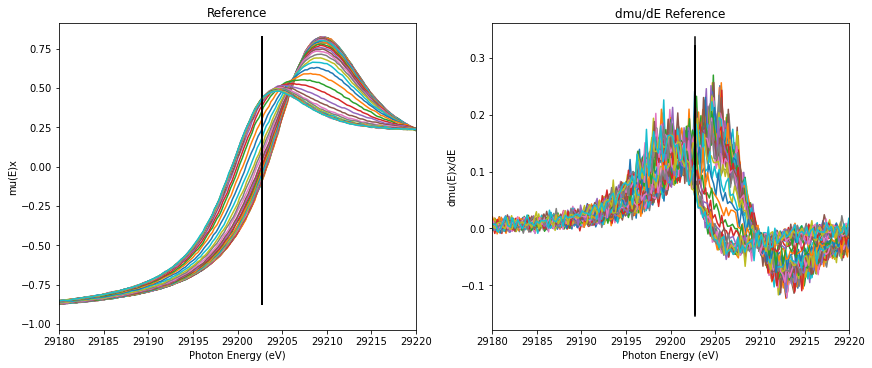

In [21]:
#Approximate edge of the Sample and determine approxiamte edge position
Samp_E0 = 29200
my_exp.find_sample_e0(Samp_E0)

In [22]:
my_exp.spectra[scan_name]['Time']

Timestamp('2021-06-14 16:33:52')

In [23]:
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
name,str
del_E,float64
e0,float64


# 7. Normalize Spectra
## 7a. Define normalization paramaters (can be separate for reference channel)

In [24]:
#Normalization paramters, references to E0
pre1 = -200
pre2 = -100
norm1 = 75
norm2 = 1000
nnorm = 2
make_flat = True

## 7b. Store normalization parameters into each spectrum

In [25]:
my_exp.set_normalization_parameters('mu Reference', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)

my_exp.set_normalization_parameters('mu Sample', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)



## 7c. Normalize and visualize spectra

In [26]:
# Normalize Specta
my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

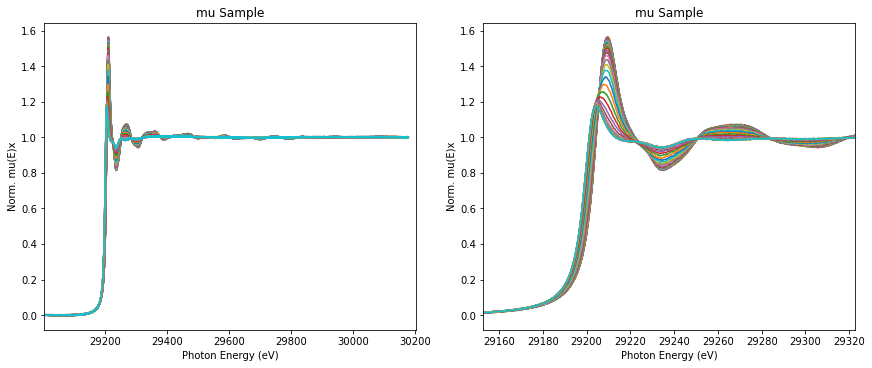

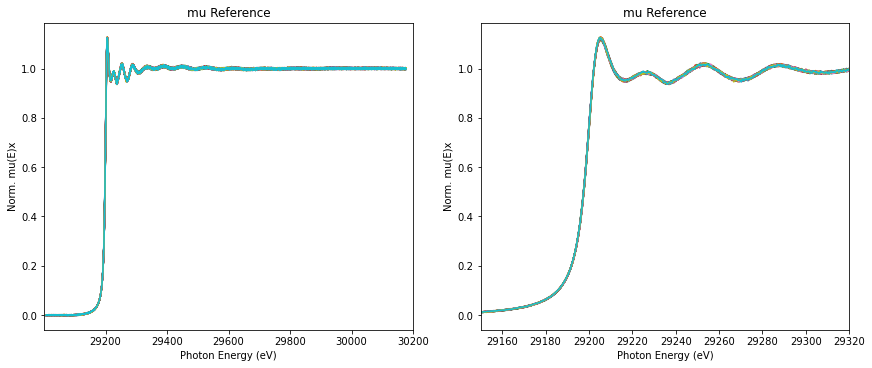

In [27]:
# Visualization of Normalized Spectra
my_exp.plot_norm_spectra(spectra = 'mu Sample')
my_exp.plot_norm_spectra(spectra = 'mu Reference')

# 8. Interpolation of XANES Spectra
## 8a. Determining how to interpolate XAS Structure

In [28]:
df = my_exp.check_Energy_Range()

Variation in starting energy points between spectra [eV]: 29005.399-29005.916
Variation in ending energy points between spectra [eV]: 30176.162-30176.610
Variation in step size of energy points between spectra [eV]: 0.242-0.242


In [29]:
# Visualize parameters for each spectra
df

,E_min,E_max,Min_E_Step,Max_E_Step,Mean_E_Step,STD_E_Step
0,29005.399023,30176.162003,0.055952,0.364590,0.241993,0.034633
1,29005.812410,30176.609650,0.055954,0.365132,0.242050,0.034437
2,29005.709062,30176.553693,0.055954,0.365202,0.242060,0.034601
3,29005.657389,30176.441781,0.055953,0.365273,0.242048,0.034678
4,29005.760736,30176.497737,0.055953,0.364957,0.242038,0.034486
5,29005.760736,30176.497737,0.055953,0.364634,0.242038,0.034392
6,29005.760736,30176.497737,0.055953,0.365138,0.241988,0.034592
7,29005.864084,30176.609650,0.055954,0.365270,0.242040,0.034295
8,29005.760736,30176.497737,0.055953,0.364773,0.242038,0.034478
9,29005.760736,30176.497737,0.055953,0.364817,0.241988,0.034664


## 8b. Interpolate XANES Spectra onto defined grid

In [30]:
# Set the energy range and step size to interpolate onto
start = 29050
stop = 29450
step = 0.25

# Interpolate Spectra
result = my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

<AxesSubplot:xlabel='energy'>

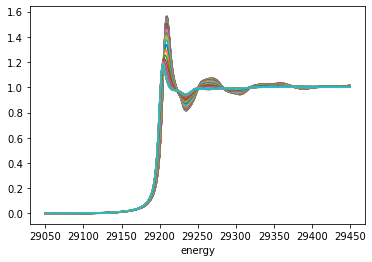

In [31]:
# Visualzie Interpolated Spectra
result.plot(legend=False)

In [32]:
# Inspect DataFrame containing interpoalted spectra
result

,2021-06-14 16:33:52,2021-06-14 16:35:37,2021-06-14 16:37:23,2021-06-14 16:39:11,2021-06-14 16:40:57,2021-06-14 16:42:42,2021-06-14 16:44:27,2021-06-14 16:46:13,2021-06-14 16:47:59,2021-06-14 16:49:44,...,2021-06-14 17:44:29,2021-06-14 17:46:15,2021-06-14 17:48:01,2021-06-14 17:49:47,2021-06-14 17:51:32,2021-06-14 17:53:18,2021-06-14 17:55:04,2021-06-14 17:56:50,2021-06-14 17:58:36,2021-06-14 18:00:22
energy,,,,,,,,,,,,,,,,,,,,,
29050.00,0.000514,0.000546,-0.001553,-0.000114,0.000161,-0.000634,-0.002264,0.000557,0.000471,-0.004015,...,0.000302,-0.000618,-0.000539,0.000912,-0.000228,-0.000048,0.000115,-0.000825,-0.000613,-0.000686
29050.25,0.000836,0.001078,-0.000574,0.001607,-0.000725,-0.001600,0.000261,-0.000129,-0.000802,-0.003397,...,-0.000618,-0.000628,-0.000764,0.000413,-0.000473,0.000735,0.000164,-0.000097,-0.000106,-0.001239
29050.50,-0.000393,0.000450,-0.000030,0.000103,-0.000079,-0.002177,0.000390,-0.000194,-0.001681,-0.000487,...,-0.000466,-0.000905,-0.001337,-0.000789,-0.000881,0.000574,-0.000406,0.000332,-0.001294,-0.001213
29050.75,-0.000199,-0.000202,0.000433,-0.000276,-0.000296,-0.001904,0.000583,-0.000590,-0.001930,0.000767,...,0.000348,-0.000216,-0.000914,-0.000775,-0.001991,-0.000688,-0.000106,-0.001530,-0.000715,-0.000416
29051.00,0.000003,-0.001819,0.000735,0.000142,-0.001724,-0.001119,0.001308,0.000510,-0.001820,-0.000523,...,0.000299,-0.000160,0.000784,-0.001603,-0.000906,-0.000479,-0.001425,-0.001164,-0.000775,-0.000447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449.00,1.012277,1.013335,1.009653,1.014842,1.015270,1.015224,1.011951,1.011764,1.011140,1.011491,...,1.002876,1.004359,1.003260,1.004028,1.004321,1.003057,1.005272,1.004518,1.004796,1.003846
29449.25,1.012164,1.012147,1.010753,1.011636,1.013895,1.013531,1.012528,1.011951,1.011675,1.011676,...,1.003454,1.004181,1.005288,1.004124,1.005318,1.002567,1.004369,1.004092,1.002953,1.002302
29449.50,1.011065,1.011627,1.013635,1.014822,1.012387,1.011068,1.013511,1.013478,1.011310,1.011259,...,1.005267,1.003947,1.005989,1.002352,1.004374,1.003428,1.006031,1.003219,1.003607,1.004995


## 8c. Save the dataframe to a csv file 

In [33]:
# Define path and filename to save Normalized XANES:
output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'
result_name = 'NormXANES'

# Save Normalized XANES:
result.to_csv(os.path.join(output_dir,result_name + '.csv'), sep=',', header=True, index=True)

In [34]:
elapsed = time.time() - t1
print(f'Elapsed time: {elapsed:.2f} s')

Elapsed time: 8.76 s
